In [2]:
import numpy as np
import matplotlib.pyplot as plt
from configs import project_config
import os
from tqdm import tqdm
import statsmodels.api as sm
from scipy.stats import norm
from joblib import Parallel, delayed

In [18]:
Xs = np.linspace(-2, 2, 256)

save_dir = project_config.ROOT_DIR + f"experiments/results/"
for file in os.listdir(save_dir):
    if "benchmark" in file and "1000N" in file:
        drift_hats = np.load(save_dir + file)
        for f in file.split("_"):
            if "bw" in f:
                bw = float(f"0.{f[1:-2]}")

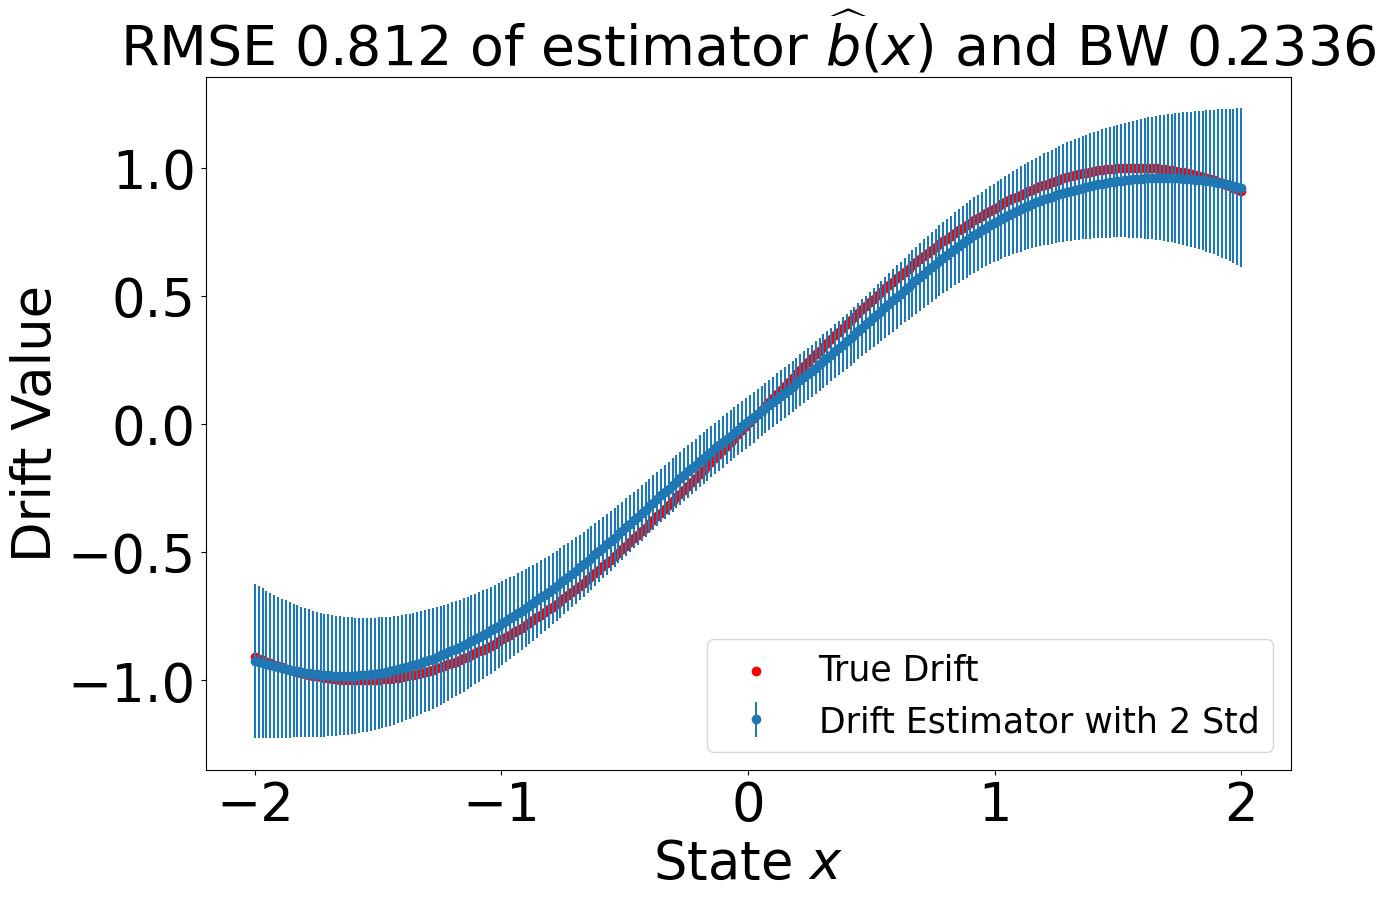

0.8122541880570135


In [19]:
fig, ax = plt.subplots(figsize=(14, 9))
mean_drift_hats = np.mean(drift_hats, axis=1)
rmse = np.linalg.norm(mean_drift_hats-np.sin(Xs))
std = np.std(drift_hats, axis=1)
plt.scatter(Xs, np.sin(Xs), color="red", label="True Drift")
plt.errorbar(Xs, mean_drift_hats,fmt="o", yerr=2*std, label="Drift Estimator with 2 Std")
ax.set_title(rf"RMSE {round(rmse,3)} of estimator $\widehat{{b}}(x)$ and BW {round(bw,4)}", fontsize=40)
ax.tick_params(labelsize=38)
ax.set_xlabel("State $x$", fontsize=38)
ax.set_ylabel("Drift Value", fontsize=38)
ax.legend(loc="lower right", fontsize=25)
plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/benchmark_sinusoidal.png", bbox_inches='tight')
plt.show()
plt.close()
print(rmse)